In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split

def plot_curve(epochs, hist, list_of_metrics, name, title, label_list, savename=None):
    """Plot a curve of one or more classification metrics vs. epoch."""
    plt.figure(figsize=(8,5))
    mf = 18

    plt.title(title)
    plt.xlabel("Epoch "+name, fontsize=mf)
    plt.ylabel("mean absolute error", fontsize=mf)


    for (m, label) in zip(list_of_metrics, label_list):
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=label)
    plt.legend(fontsize=mf)
    if savename is not None:
        plt.savefig(f"plots/{savename}.eps", format="eps")
    
    
# for activation functions check https://keras.io/api/layers/activations/
def create_model2(my_learning_rate,layers, my_feature_layer,my_metrics,my_act_function = "softmax"):
    model = tf.keras.models.Sequential()
    model.add(my_feature_layer)

    for layer in layers:
        model.add(tf.keras.layers.Dense(units = layer, activation = my_act_function))
    model.add(tf.keras.layers.Dense(units=1,name='Output', activation = 'relu'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=my_learning_rate,momentum=0.2),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=my_metrics)
    return model

def create_model_optimizer(hp):
    model = tf.keras.models.Sequential()
    
    
    hp_layers=hp.Int('number_layers', min_value = 2, max_value = 9, step = 1)
    hp_units=[]

    for i in range(hp_layers):
        hp_units.append(hp.Int(str('units'+str(i)), min_value = 5, max_value = 55, step = 5))
        model.add(tf.keras.layers.Dense(units = hp_units[-1], activation = 'relu'))
        
        
        
    hp_lr=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_momentum=hp.Choice('momentum', values=[1e-2, 1e-1, 2e-1,5e-1])

    model.add(tf.keras.layers.Dense(units=1,name='Output', activation = 'relu'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=hp_lr,momentum=0.2),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
    return model


def train_model_tuner(model, x,y, epochs, label_name,
                batch_size=None,shuffle=True):
    
    history = model.fit(x=x, y=y, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2, verbose = 0)
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist

def train_model(model, dataset, epochs, label_name,
                batch_size=None,shuffle=True):
    features = {name:np.array(value) for name, value in dataset.items()}
    label=dataset[label_name].to_numpy()
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2, verbose =0)
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,dataset,label_name, batch_size):
    features = {name:np.array(value) for name, value in dataset.items()}
    label=dataset[label_name].to_numpy()
    evaluation=model.evaluate(x = features, y = label, batch_size=batch_size, verbose = 0)
    print("evaluation:", evaluation)
    predicted = model.predict(features)
    
    df_test=pd.DataFrame(label,columns=[label_name])

    df_predict=pd.DataFrame(predicted,columns=[label_name+"_pred"])
    return pd.concat([df_test,df_predict], axis=1)


def test_model_tuner(model,x,y,label_name):
    
    evaluation=model.evaluate(x = x, y = y, batch_size=batch_size)
    print(evaluation)
    predicted = model.predict(x)
    
    df_test=pd.DataFrame(y,columns=[label_name])

    df_predict=pd.DataFrame(predicted,columns=[label_name+"_pred"])
    return pd.concat([df_test,df_predict], axis=1)









In [7]:
#G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data
df_lambda=pd.read_csv("../../generated_Data/lambda_100_steps.csv")[["lambda","main_maximum"]]
df_delta=pd.read_csv("../../generated_Data/delta_100_steps.csv")[["delta","main_maximum"]]


lambda_train, lambda_test = train_test_split(df_lambda, test_size=0.20, random_state=42)
delta_train, delta_test = train_test_split(df_delta, test_size=0.20, random_state=42)

df_delta.head(100)

,delta,main_maximum
0,0.324040,0.488
1,0.320000,0.378
2,0.322020,0.432
3,0.326061,0.542
4,0.328081,0.598
...,...,...
70,0.511919,-0.132
71,0.515960,-0.192
72,0.509899,0.126
73,0.513939,-0.094


In [8]:
feature_columns_A = []
no_of_max = tf.feature_column.numeric_column("main_maximum")
feature_columns_A.append(no_of_max)
my_feature_layer_A = tf.keras.layers.DenseFeatures(feature_columns_A)

In [9]:
learning_rate = 1e-3
epochs = 150
batch_size = 20

#specify the classification threshold
classification_threshold = 0.15

# Establish the metrics the model will measure.
metric = [tf.keras.metrics.MeanAbsoluteError()]
layers=[40,40,10]


label_delta="delta"
label_lambda="lambda"


my_model_lambda = create_model2(learning_rate,layers, my_feature_layer_A,metric,my_act_function="relu")
my_model_delta = create_model2(learning_rate,layers, my_feature_layer_A,metric,my_act_function="relu")

#lambda_train, lambda_test
#delta_train, delta_test

epochs_lambda, hist_lambda = train_model(my_model_lambda, lambda_train, epochs, 
                          label_lambda, batch_size)

epochs_delta, hist_delta = train_model(my_model_delta, delta_train, epochs, 
                          label_delta, batch_size)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


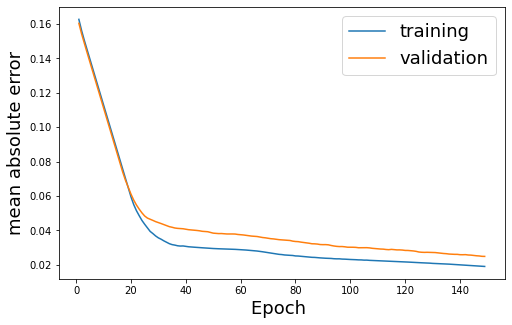

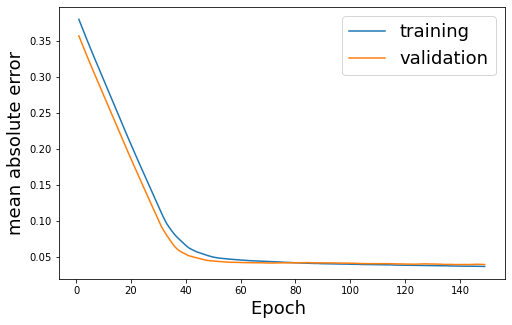

In [10]:
# Plot a graph of the metric(s) vs. epochs.
#list_of_metrics_to_plot = ['accuracy'] 
#print(hist_delta.head())
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
label_names = ["training", "validation"]

plot_curve(epochs_lambda, hist_lambda, list_of_metrics_to_plot,"","",label_names,savename = "lambda_small_dataset_energy_max_epoch")

plot_curve(epochs_delta, hist_delta, list_of_metrics_to_plot,"","",label_names,savename = "delta_small_dataset_energy_max_epoch")

In [12]:
delta_test_result=test_model(my_model_delta,delta_test,label_delta,batch_size=batch_size)
delta_test_result.head(50)

evaluation: [0.041278861463069916, 0.041278861463069916]
Consider rewriting this model with the Functional API.


,delta,delta_pred
0,0.328081,0.387197
1,0.489697,0.461919
2,0.346263,0.417226
3,0.324040,0.379960
4,0.416970,0.372112
5,0.491717,0.519143
6,0.406869,0.372112
7,0.340202,0.413861
8,0.501818,0.522640
9,0.495758,0.421605


In [ ]:
lablda_test_result=test_model(my_model_lambda,lambda_test,label_lambda)
lablda_test_result.head(50)

[0.22575758 0.18030303 0.21060606 0.17424242 0.16515152 0.15757576
 0.13636364 0.22424242 0.11818182 0.1030303  0.12272727 0.14848485
 0.20606061 0.15       0.23636364 0.10606061 0.21969697 0.21818182
 0.12121212 0.1469697 ]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


,lambda,lambda_pred
0,0.225758,0.217823
1,0.180303,0.184749
2,0.210606,0.206662
3,0.174242,0.180891
4,0.165152,0.175194
5,0.157576,0.170416
6,0.136364,0.145565
7,0.224242,0.216729
8,0.118182,0.127019
9,0.103030,0.126198


In [8]:
MAX_TRIALS = 20

EXECUTIONS_PER_TRIAL = 3

tuner_lambda = kt.RandomSearch(

    create_model_optimizer,

    objective='val_mean_absolute_error',

    max_trials=MAX_TRIALS,

    executions_per_trial=EXECUTIONS_PER_TRIAL,

    directory='lambda_100_model_main_max',
    #overwrite = True,
    project_name='first Try',

    seed=1

)
x_train_lambda=lambda_train["main_maximum"].to_numpy()
y_train_lambda=lambda_train["lambda"].to_numpy()
x_test_lambda=lambda_test["main_maximum"].to_numpy()
y_test_lambda=lambda_test["lambda"].to_numpy()
#lambda_train, lambda_test
#delta_train, delta_test
tuner_lambda.search(x_train_lambda, y_train_lambda, epochs = 200, validation_data = (x_test_lambda, y_test_lambda), verbose = 0)


INFO:tensorflow:Reloading Oracle from existing project lambda_100_model_main_max/first Try/oracle.json
INFO:tensorflow:Oracle triggered exit


In [9]:
tuner_lambda.results_summary()


Results summary
Results in lambda_100_model_main_max/first Try
Showing 10 best trials
Trial summary
Hyperparameters:
number_layers: 4
units0: 5
units1: 10
learning_rate: 0.001
momentum: 0.01
units2: 25
units3: 25
units4: 5
units5: 30
units6: 20
units7: 35
units8: 25
Score: 0.001802225267359366
Trial summary
Hyperparameters:
number_layers: 3
units0: 20
units1: 30
learning_rate: 0.01
momentum: 0.5
units2: 40
units3: 15
units4: 45
units5: 10
units6: 25
units7: 10
units8: 15
Score: 0.003255187921846906
Trial summary
Hyperparameters:
number_layers: 7
units0: 55
units1: 55
learning_rate: 0.01
momentum: 0.2
units2: 30
units3: 35
units4: 40
units5: 25
units6: 10
units7: 30
units8: 10
Score: 0.0037852289776007333
Trial summary
Hyperparameters:
number_layers: 3
units0: 40
units1: 40
learning_rate: 0.01
momentum: 0.2
units2: 10
units3: 20
units4: 50
units5: 30
units6: 25
units7: 45
units8: 45
Score: 0.05730937570721532
Trial summary
Hyperparameters:
number_layers: 6
units0: 10
units1: 5
learning_

In [10]:
tuner_lambda.oracle.get_best_trials(num_trials=2)[0].hyperparameters.values

{'number_layers': 4,
 'units0': 5,
 'units1': 10,
 'learning_rate': 0.001,
 'momentum': 0.01,
 'units2': 25,
 'units3': 25,
 'units4': 5,
 'units5': 30,
 'units6': 20,
 'units7': 35,
 'units8': 25}

In [11]:
tuner_lambda.oracle.get_best_trials(num_trials=2)[1].hyperparameters.values

{'number_layers': 3,
 'units0': 20,
 'units1': 30,
 'learning_rate': 0.01,
 'momentum': 0.5,
 'units2': 40,
 'units3': 15,
 'units4': 45,
 'units5': 10,
 'units6': 25,
 'units7': 10,
 'units8': 15}

In [12]:
best_model_lambda = tuner_lambda.get_best_models()[0]
epochs_lambda_best, hist_lambda_best = train_model_tuner(best_model_lambda, x_train_lambda, y_train_lambda, epochs, 
                          label_lambda, batch_size)


In [13]:
lablda_tuner_result=test_model_tuner(best_model_lambda,x_test_lambda, y_test_lambda,label_lambda)
lablda_tuner_result.head(50)

1/1 [==============================] - 0s 153ms/step - loss: 7.9823e-04 - mean_absolute_error: 7.9823e-04
[0.0007982254028320312, 0.0007982254028320312]


,lambda,lambda_pred
0,0.225758,0.225439
1,0.180303,0.179910
2,0.210606,0.210262
3,0.174242,0.173751
4,0.165152,0.164659
5,0.157576,0.157033
6,0.136364,0.135345
7,0.224242,0.223951
8,0.118182,0.117001
9,0.103030,0.107006


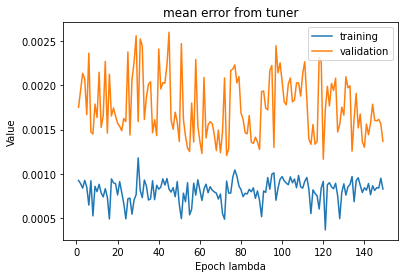

In [15]:
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
plot_curve(epochs_lambda_best, hist_lambda_best, list_of_metrics_to_plot,"lambda", title="mean error from tuner", label_list=["training", "validation"])

In [16]:
#best_model_lambda.save("saved_Models/lambda_100_best_model_main_max_err_0_0027")

In [17]:
MAX_TRIALS = 20

EXECUTIONS_PER_TRIAL = 3

tuner_delta = kt.RandomSearch(

    create_model_optimizer,

    objective='val_mean_absolute_error',

    max_trials=MAX_TRIALS,

    executions_per_trial=EXECUTIONS_PER_TRIAL,

    directory='delta_100_model_main_max',
    overwrite = True,
    project_name='second Try',

    seed=1

)
x_train_delta=delta_train["main_maximum"].to_numpy()
y_train_delta=delta_train["delta"].to_numpy()
x_test_delta=delta_test["main_maximum"].to_numpy()
y_test_delta=delta_test["delta"].to_numpy()
#lambda_train, lambda_test
#delta_train, delta_test
tuner_delta.search(x_train_delta, y_train_delta, epochs = 200, validation_data = (x_test_delta, y_test_delta), verbose =0)


INFO:tensorflow:Oracle triggered exit


In [18]:
tuner_delta.results_summary()


Results summary
Results in delta_100_model_main_max/second Try
Showing 10 best trials
Trial summary
Hyperparameters:
number_layers: 3
units0: 40
units1: 40
learning_rate: 0.01
momentum: 0.2
units2: 10
units3: 20
units4: 50
units5: 30
units6: 25
units7: 45
units8: 45
Score: 0.029977128530542057
Trial summary
Hyperparameters:
number_layers: 3
units0: 55
units1: 15
learning_rate: 0.01
momentum: 0.2
units2: 5
Score: 0.031098054721951485
Trial summary
Hyperparameters:
number_layers: 5
units0: 5
units1: 55
learning_rate: 0.01
momentum: 0.1
units2: 10
units3: 35
units4: 30
units5: 10
units6: 20
units7: 50
units8: 20
Score: 0.034057909001906715
Trial summary
Hyperparameters:
number_layers: 4
units0: 45
units1: 30
learning_rate: 0.01
momentum: 0.1
units2: 25
units3: 35
units4: 45
units5: 35
units6: 35
units7: 30
units8: 10
Score: 0.15694987153013548
Trial summary
Hyperparameters:
number_layers: 3
units0: 20
units1: 30
learning_rate: 0.01
momentum: 0.5
units2: 40
units3: 15
units4: 45
units5: 10

In [19]:
tuner_delta.oracle.get_best_trials(num_trials=2)[0].hyperparameters.values

{'number_layers': 3,
 'units0': 40,
 'units1': 40,
 'learning_rate': 0.01,
 'momentum': 0.2,
 'units2': 10,
 'units3': 20,
 'units4': 50,
 'units5': 30,
 'units6': 25,
 'units7': 45,
 'units8': 45}

In [20]:
tuner_delta.oracle.get_best_trials(num_trials=2)[1].hyperparameters.values

{'number_layers': 3,
 'units0': 55,
 'units1': 15,
 'learning_rate': 0.01,
 'momentum': 0.2,
 'units2': 5}

In [ ]:
best_model_delta = tuner_delta.get_best_models()[0]
epochs_delta_best, hist_delta_best = train_model_tuner(best_model_delta, x_train_delta, y_train_delta, 10, 
                          label_delta, batch_size)


Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1/1 [==============================] - ETA: 0s - loss: 0.0296 - mean_absolute_error: 0.029 - 0s 61ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.0293 - mean_absolute_error: 0.029 - 0s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.0292 - mea

In [ ]:
delta_tuner_result=test_model_tuner(best_model_delta,x_test_delta, y_test_delta,label_delta)
delta_tuner_result.head(50)

1/1 [==============================] - ETA: 0s - loss: 0.0291 - mean_absolute_error: 0.029 - 0s 2ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
[0.029135489836335182, 0.029135489836335182]


,delta,delta_pred
0,0.328081,0.371428
1,0.489697,0.484498
2,0.346263,0.411242
3,0.324040,0.367015
4,0.416970,0.382024
5,0.491717,0.492449
6,0.406869,0.382024
7,0.340202,0.407332
8,0.501818,0.493155
9,0.495758,0.473621


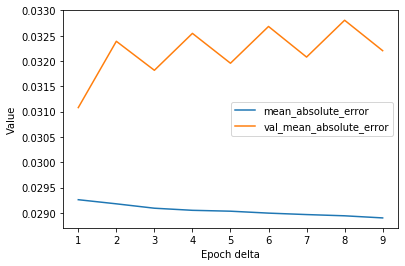

In [ ]:
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
plot_curve(epochs_delta_best, hist_delta_best, list_of_metrics_to_plot,"delta")

In [ ]:
best_model_delta.save("saved_Models/lambda_100_best_model_main_max_err_0_03")

INFO:tensorflow:Assets written to: saved_Models/lambda_100_best_model_main_max_err_0_03\assets
